In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cluster_mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

# preprocessing data

In [4]:
df['name']=df['name'].str.split(' ').str[0]
df['name']

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
387         ford
388           vw
389        dodge
390         ford
391        chevy
Name: name, Length: 392, dtype: object

In [4]:
df['name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [5]:
df[df['name']=='toyouta']=df[df['name']=='toyouta'].replace(to_replace='toyouta' , value='toyota')

In [6]:
df[df['name']=='maxda']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
110,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda
292,34.1,4,86.0,65.0,1975,15.2,79,japan,maxda


In [7]:
df[df['name']=='maxda']=df[df['name']=='maxda'].replace(to_replace='maxda' , value='mazda')

In [8]:
df[df['name']=='chevroelt']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
159,16.0,6,250.0,105.0,3897,18.5,75,usa,chevroelt


In [9]:
df[df['name']=='chevroelt']=df[df['name']=='chevroelt'].replace(to_replace='chevroelt' , value='chevrolet')

In [10]:
df[df['name']=='mercedes']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
295,25.4,5,183.0,77.0,3530,20.1,79,europe,mercedes


In [11]:
df[df['name']=='mercedes']=df[df['name']=='mercedes'].replace(to_replace='mercedes' , value='mercedes-benz')

In [12]:
df[df['name']=='vokswagen']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
329,29.8,4,89.0,62.0,1845,15.3,80,europe,vokswagen


In [13]:
df[df['name']=='vokswagen']=df[df['name']=='vokswagen'].replace(to_replace='vokswagen' , value='volkswagen')

In [14]:
df_dummies=pd.get_dummies(df)
df_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,...,name_plymouth,name_pontiac,name_renault,name_saab,name_subaru,name_toyota,name_triumph,name_volkswagen,name_volvo,name_vw
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,False,False,True,...,False,False,False,False,False,False,False,False,False,False
388,44.0,4,97.0,52.0,2130,24.6,82,True,False,False,...,False,False,False,False,False,False,False,False,False,True
389,32.0,4,135.0,84.0,2295,11.6,82,False,False,True,...,False,False,False,False,False,False,False,False,False,False
390,28.0,4,120.0,79.0,2625,18.6,82,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df_dummies.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [16]:
df_dummies.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_europe', 'origin_japan',
       'origin_usa', 'name_amc', 'name_audi', 'name_bmw', 'name_buick',
       'name_cadillac', 'name_capri', 'name_chevrolet', 'name_chevy',
       'name_chrysler', 'name_datsun', 'name_dodge', 'name_fiat', 'name_ford',
       'name_hi', 'name_honda', 'name_mazda', 'name_mercedes-benz',
       'name_mercury', 'name_nissan', 'name_oldsmobile', 'name_opel',
       'name_peugeot', 'name_plymouth', 'name_pontiac', 'name_renault',
       'name_saab', 'name_subaru', 'name_toyota', 'name_triumph',
       'name_volkswagen', 'name_volvo', 'name_vw'],
      dtype='object')

# scaling data with MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df_dummies=scale.fit_transform(df_dummies)

In [20]:
df_dummies=pd.DataFrame(df_dummies , columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_europe', 'origin_japan',
       'origin_usa', 'name_amc', 'name_audi', 'name_bmw', 'name_buick',
       'name_cadillac', 'name_capri', 'name_chevrolet', 'name_chevy',
       'name_chrysler', 'name_datsun', 'name_dodge', 'name_fiat', 'name_ford',
       'name_hi', 'name_honda', 'name_mazda', 'name_mercedes-benz',
       'name_mercury', 'name_nissan', 'name_oldsmobile', 'name_opel',
       'name_peugeot', 'name_plymouth', 'name_pontiac', 'name_renault',
       'name_saab', 'name_subaru', 'name_toyota', 'name_triumph',
       'name_volkswagen', 'name_volvo', 'name_vw'])
df_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,...,name_plymouth,name_pontiac,name_renault,name_saab,name_subaru,name_toyota,name_triumph,name_volkswagen,name_volvo,name_vw
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

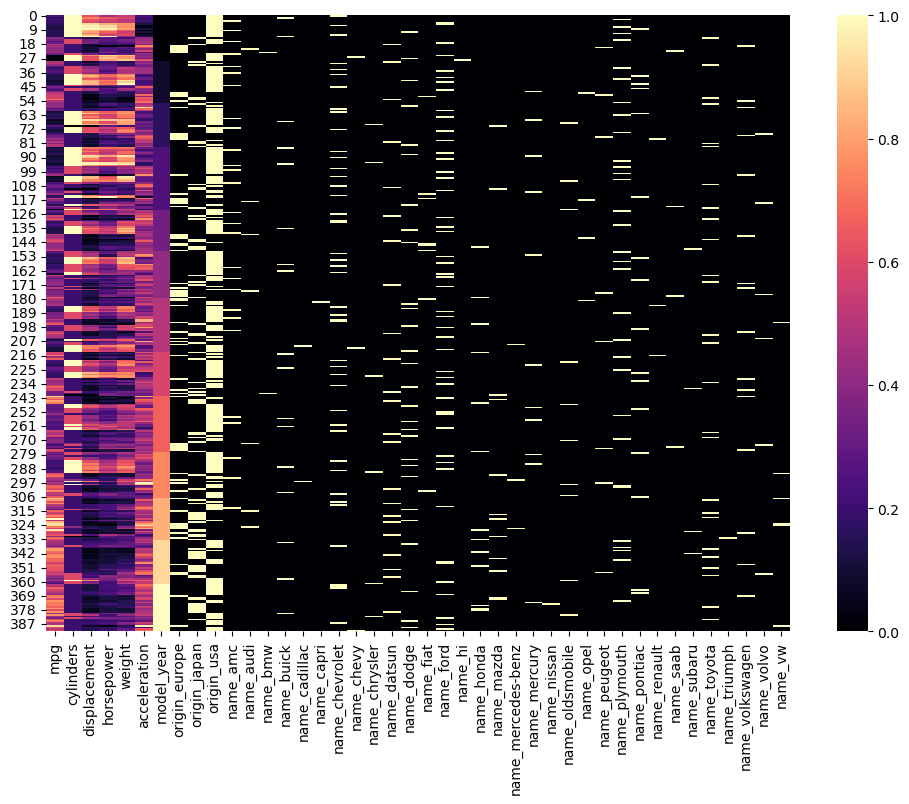

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_dummies , cmap='magma')

C:\Users\Ziba\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1500x800 with 0 Axes>

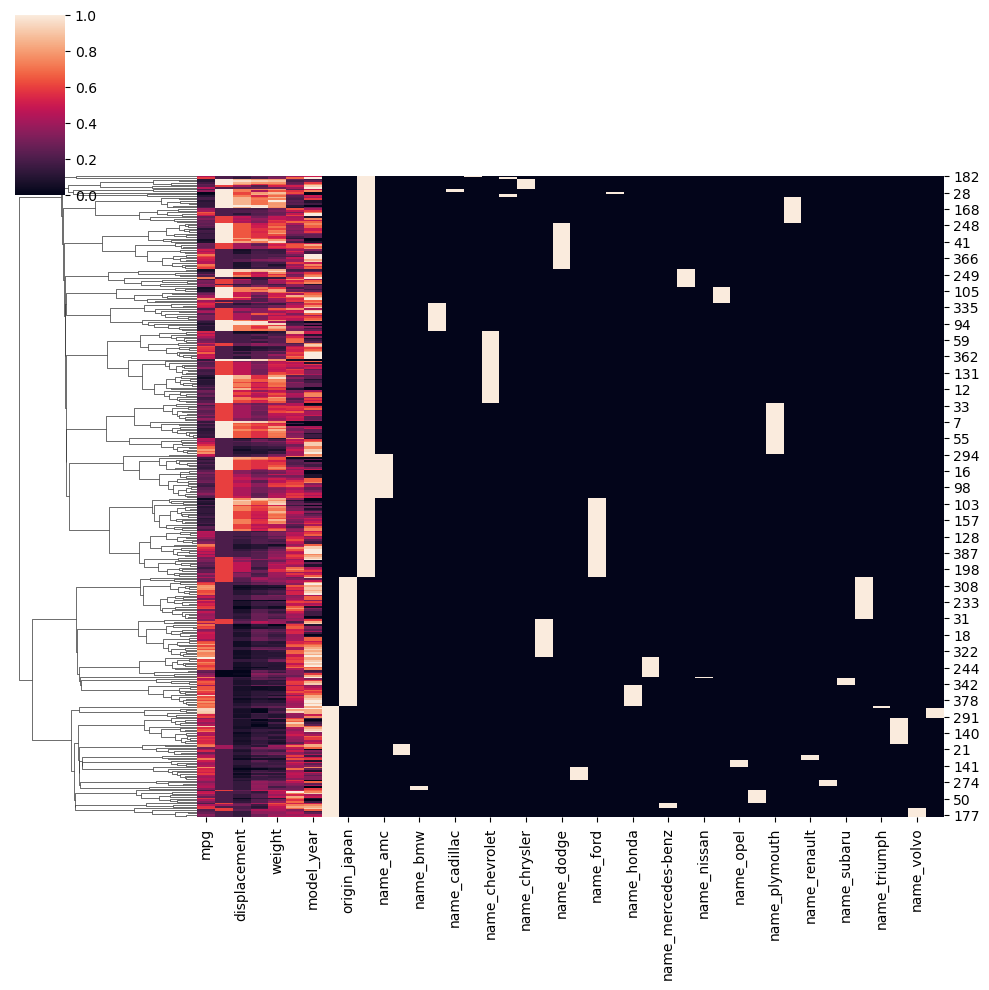

In [22]:
plt.figure(figsize=(15,8))
sns.clustermap(data=df_dummies , col_cluster=False)

In [1]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
agglomerat_model=AgglomerativeClustering(n_clusters=3)
cluster_labels=agglomerat_model.fit_predict(df_dummies)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0,

<Axes: xlabel='mpg', ylabel='weight'>

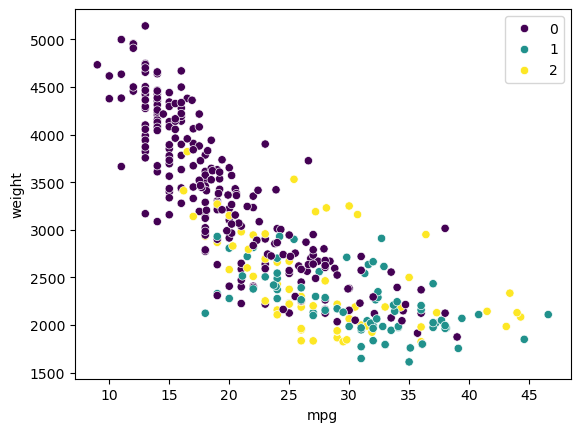

In [25]:
sns.scatterplot(data=df , x='mpg' , y='weight' , hue=cluster_labels , palette='viridis')

# محاسبه حداکثر فاصله بین دو داده و مدل سازی بر اساس آن

In [26]:
np.sqrt(len(df_dummies.columns))

6.48074069840786

In [27]:
model2=AgglomerativeClustering(n_clusters=None , distance_threshold=6)
labels2=model2.fit_predict(df_dummies)
labels2

array([4, 0, 5, 7, 1, 1, 4, 5, 0, 7, 6, 5, 4, 0, 8, 5, 7, 1, 9, 2, 2, 2,
       2, 2, 7, 1, 0, 6, 0, 9, 4, 8, 7, 5, 4, 1, 7, 4, 0, 1, 5, 6, 1, 0,
       7, 4, 0, 1, 0, 2, 2, 2, 8, 9, 2, 5, 8, 6, 2, 4, 1, 4, 0, 5, 1, 7,
       0, 0, 0, 0, 3, 7, 4, 1, 5, 2, 2, 2, 2, 1, 9, 8, 6, 8, 0, 7, 4, 1,
       6, 0, 4, 1, 5, 0, 0, 7, 5, 4, 7, 1, 5, 2, 4, 1, 5, 0, 7, 8, 4, 9,
       3, 1, 0, 2, 4, 0, 2, 2, 2, 2, 6, 2, 8, 0, 5, 7, 4, 9, 1, 8, 4, 4,
       7, 5, 1, 0, 6, 1, 7, 2, 2, 2, 8, 9, 6, 2, 2, 3, 3, 2, 5, 4, 0, 1,
       0, 4, 5, 1, 0, 4, 7, 5, 0, 4, 1, 8, 1, 7, 0, 8, 2, 9, 1, 2, 7, 2,
       2, 2, 2, 3, 2, 2, 0, 6, 2, 4, 6, 7, 1, 5, 4, 1, 7, 4, 4, 2, 3, 6,
       1, 0, 7, 2, 9, 8, 1, 2, 5, 2, 8, 2, 0, 0, 1, 6, 3, 0, 2, 5, 9, 4,
       0, 6, 0, 4, 0, 5, 1, 0, 4, 0, 1, 2, 0, 8, 1, 4, 6, 3, 2, 9, 2, 3,
       2, 1, 3, 9, 3, 0, 6, 0, 0, 4, 1, 1, 5, 7, 0, 0, 6, 7, 4, 0, 1, 6,
       4, 8, 9, 6, 8, 5, 0, 9, 2, 2, 2, 2, 2, 3, 0, 0, 1, 7, 6, 4, 1, 0,
       6, 0, 1, 4, 0, 2, 3, 6, 7, 2, 0, 2, 0, 5, 5,

In [29]:
np.unique(labels2)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

<Axes: xlabel='mpg', ylabel='weight'>

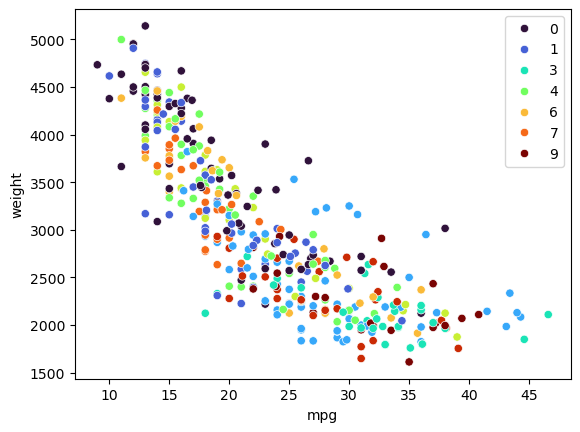

In [28]:
sns.scatterplot(data=df , x='mpg' , y='weight' , hue=labels2 , palette='turbo')

In [30]:
from scipy.cluster.hierarchy import linkage , dendrogram

In [35]:
#method of linkage -> 'single' , 'complete' , 'centroid' , 'ward' ,  'average' , 'weighted'
linkage_matrix=linkage(model2.children_)
linkage_matrix

array([[ 18.        ,  68.        ,   1.41421356,   2.        ],
       [ 13.        ,  15.        ,   1.41421356,   2.        ],
       [ 35.        ,  46.        ,   1.41421356,   2.        ],
       ...,
       [263.        , 776.        ,  49.39635614, 380.        ],
       [777.        , 778.        ,  58.05170109, 389.        ],
       [750.        , 779.        ,  81.09870529, 391.        ]])

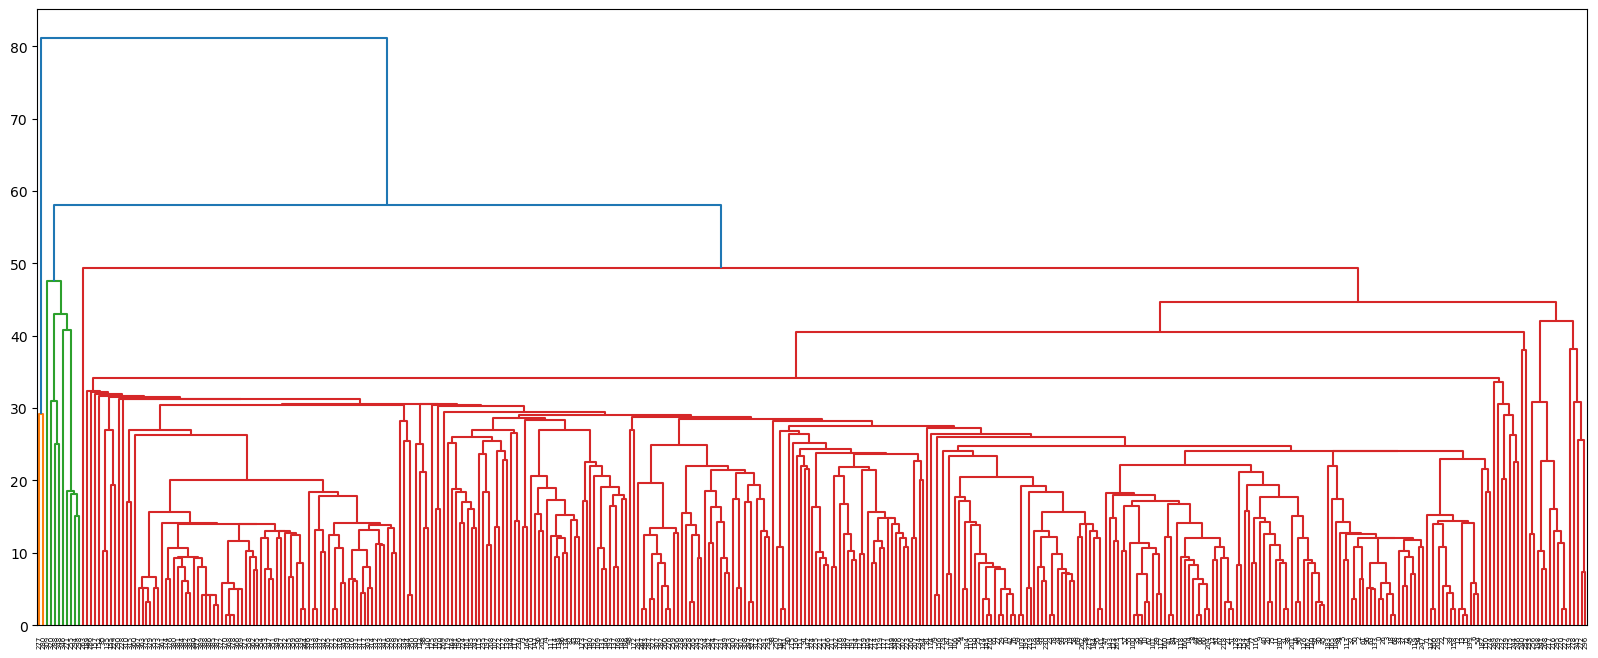

In [32]:
plt.figure(figsize=(20,8))
dn=dendrogram(linkage_matrix)
plt.xticks(rotation=90);

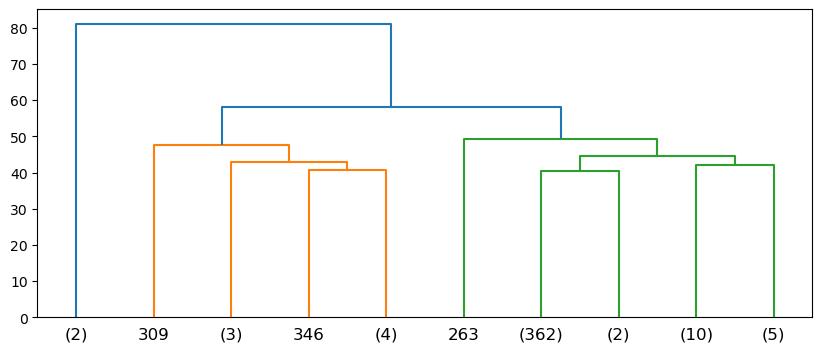

In [33]:
plt.figure(figsize=(10,4))
dn=dendrogram(linkage_matrix , truncate_mode='lastp' , p=10)

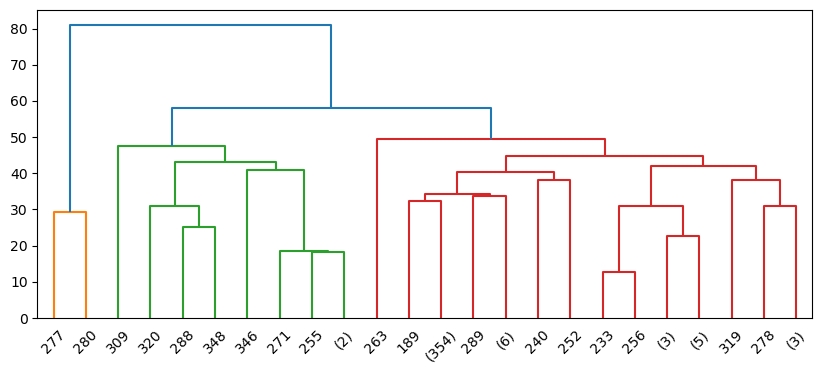

In [34]:
plt.figure(figsize=(10,4))
dn=dendrogram(linkage_matrix , truncate_mode='level' , p=6)

# محاسبه آستانه فاصله

In [43]:
df_dummies['mpg'].idxmax()

320

In [44]:
df_dummies['mpg'].idxmin()

28

In [46]:
a=df_dummies.iloc[320]
b=df_dummies.iloc[28]
dis=np.linalg.norm(a-b)
dis

2.7730168917112645